In [892]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score



In [893]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [894]:
DATA_PATH = "/content/drive/MyDrive/Book/data.csv"

In [895]:
data  = pd.read_csv(DATA_PATH)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [896]:
data.shape

(569, 33)

In [897]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [898]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [899]:
len(data.id.unique())

569

In [900]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [901]:
data.drop(columns = ["id", "Unnamed: 32"], inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Benign: 62.741652021089635%
Malignant: 37.258347978910365%



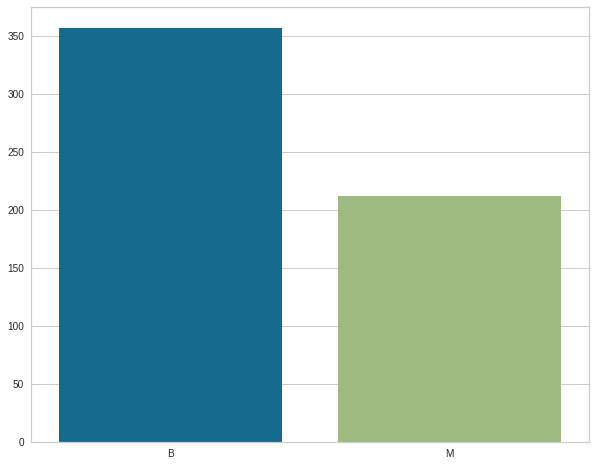

In [902]:
counts = data["diagnosis"].value_counts()
diag_cols = ["B", "M"]
diag_counts = [counts[0], counts[1]]

benign = (diag_counts[0] / sum(diag_counts))*100
malignant = (diag_counts[1] / sum(diag_counts)) * 100

print(f"Benign: {benign}%")
print(f"Malignant: {malignant}%")

print()

plt.figure(figsize = (10, 8))
sns.barplot(x = diag_cols, y = diag_counts)
plt.show()

In [903]:
diag_map = {
    "M":1,
    "B":0
}

data["diagnosis"] = data["diagnosis"].map(diag_map).values.copy()

In [904]:
all_columns = list(data.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

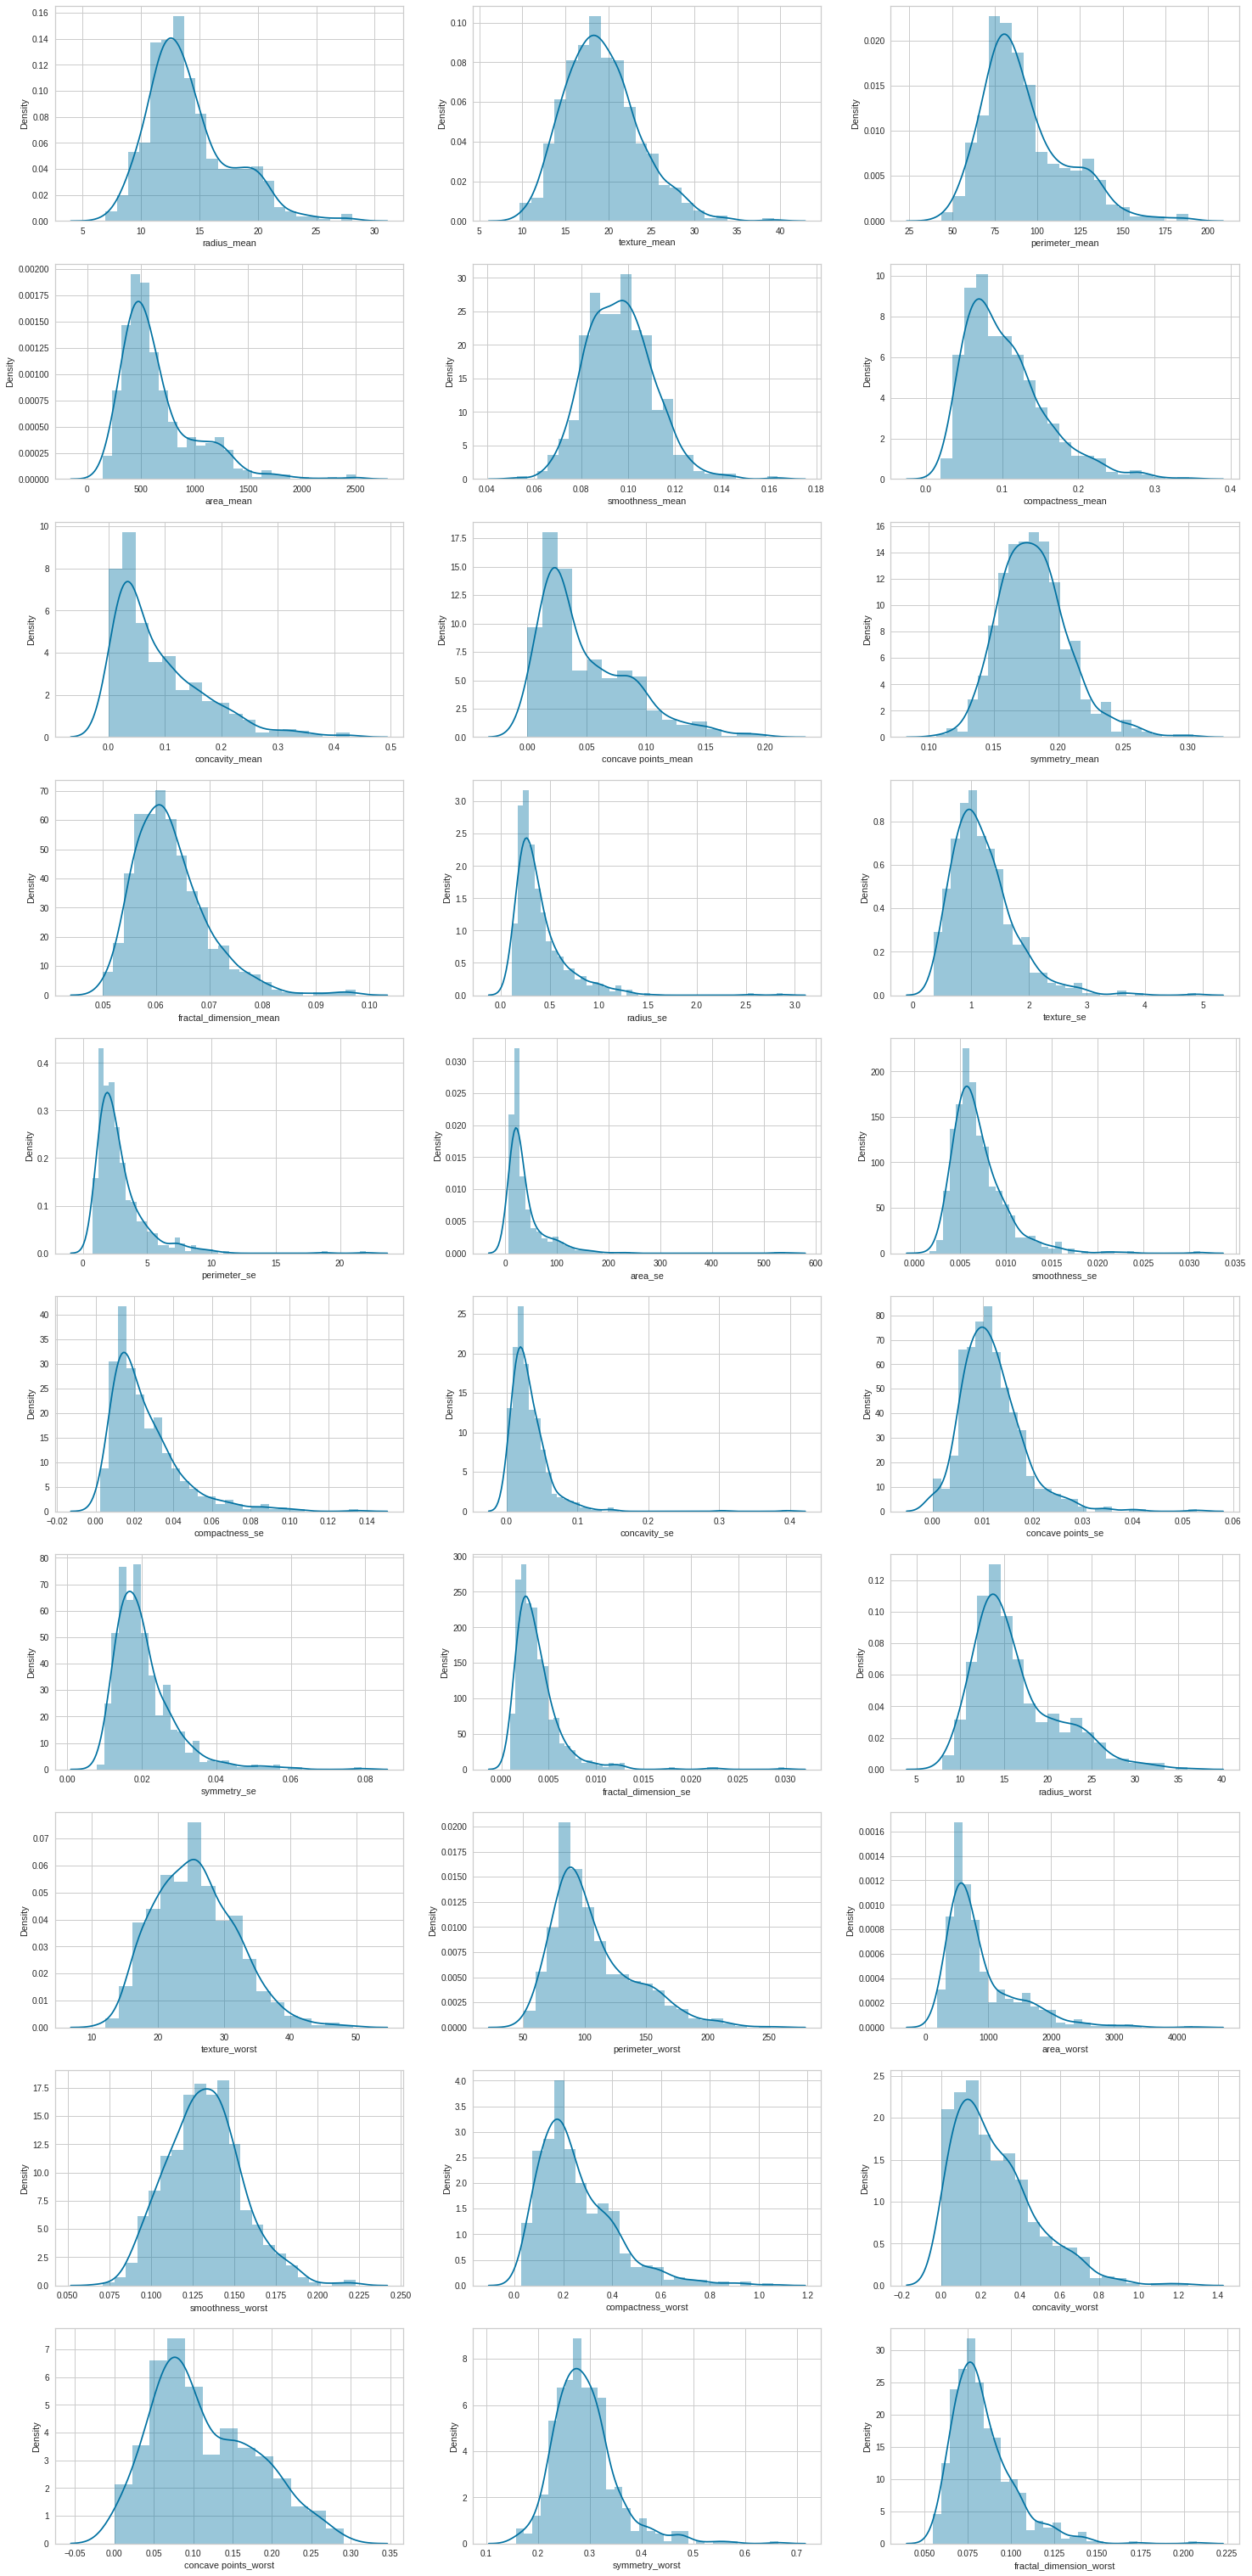

In [905]:
plt.figure(figsize = (25,55))
cols = all_columns[1:]
for i in range(30):
    plt.subplot(10, 3, i+1)
    sns.distplot(data[cols[i]])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

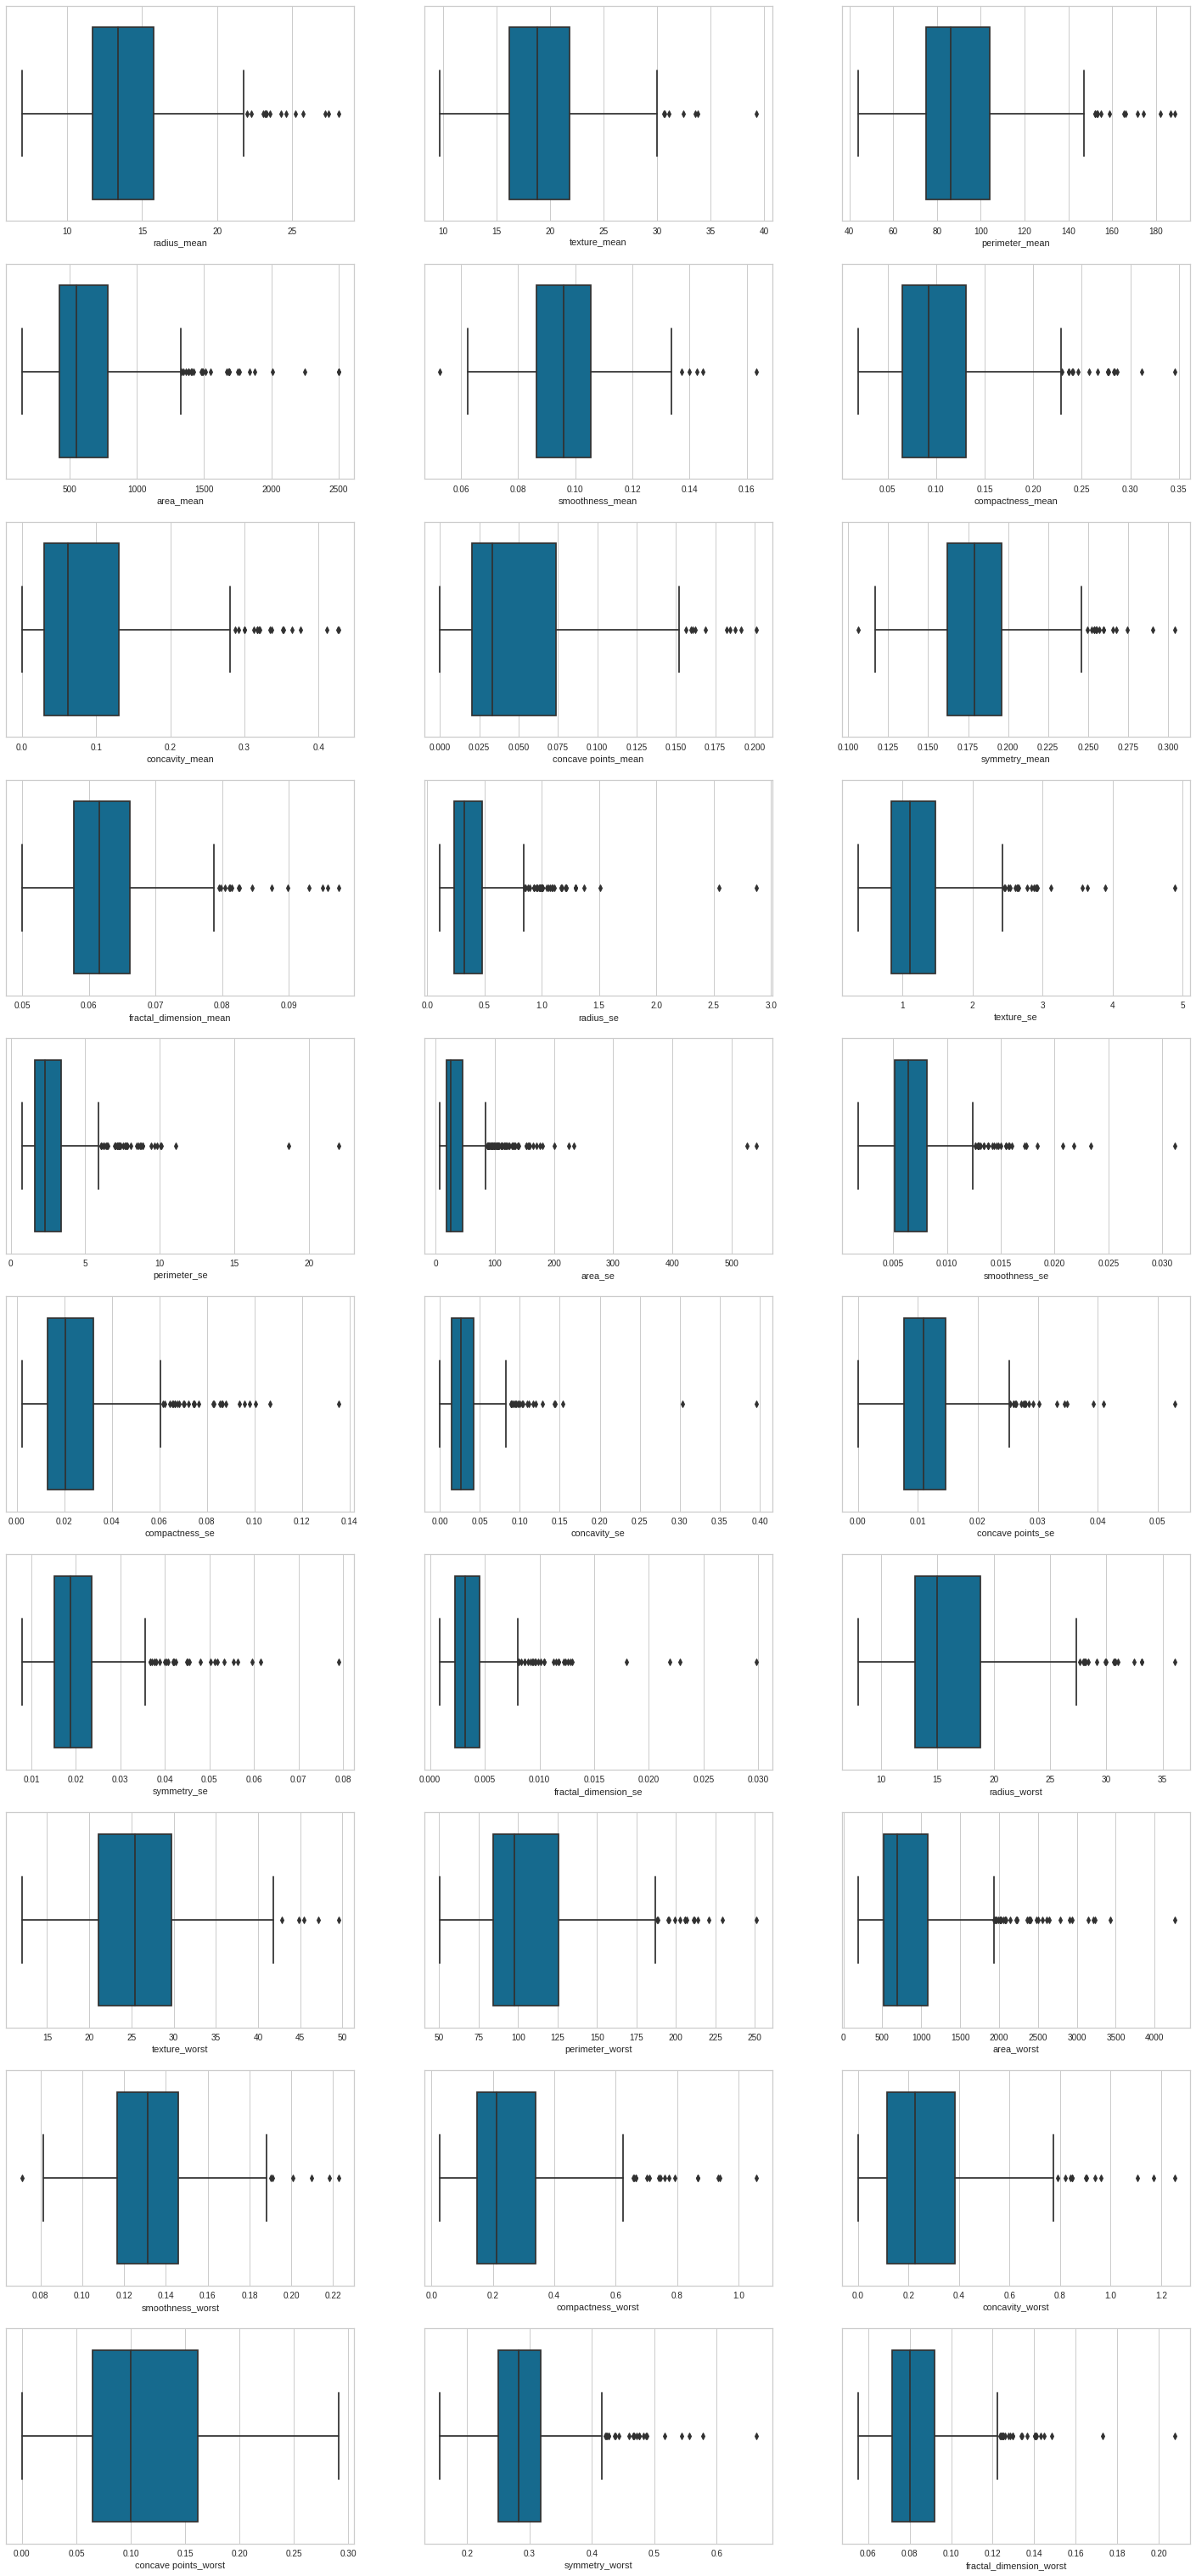

In [906]:
plt.figure(figsize = (25,55))
cols = all_columns[1:]
for i in range(30):
    plt.subplot(10, 3, i+1)
    sns.boxplot(data[cols[i]])
plt.show()

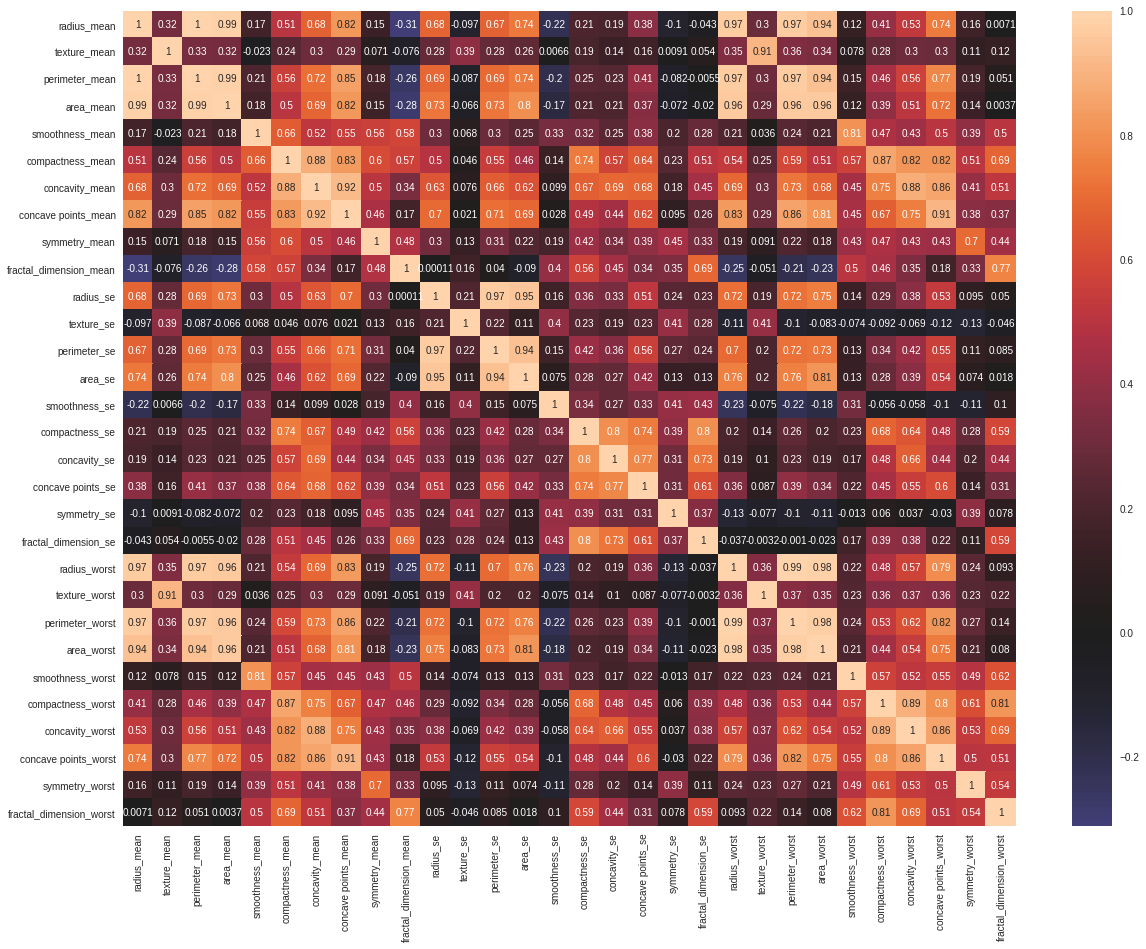

In [907]:
plt.figure(figsize = (20,15))
sns.heatmap(data[all_columns[1:]].corr(), center = 0,annot=True)
plt.show()

In [908]:
corr_matrix = data[all_columns[1:]].corr()
mask = corr_matrix >= 0.9
mask

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [909]:
correlated_cols = []
for column1 in all_columns[1:]:
    for column2 in all_columns[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in correlated_cols and pair[::-1] not in correlated_cols:
                correlated_cols.append(pair)

In [910]:
correlated_cols

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [911]:
cols = list(set([col for i in correlated_cols for col in i]))
cols_acc = {}
for column in cols:
    X = data[column]
    y = data["diagnosis"]
    model = LogisticRegression()
    model.fit(X[:250].values.reshape(-1, 1), y[:250])
    accuracy = accuracy_score(y[250:], model.predict(X[250:].values.reshape(-1, 1)))
    cols_acc[column] = accuracy
cols_acc

{'area_mean': 0.8714733542319749,
 'area_se': 0.9153605015673981,
 'area_worst': 0.9059561128526645,
 'concave points_mean': 0.9373040752351097,
 'concave points_worst': 0.9153605015673981,
 'concavity_mean': 0.9216300940438872,
 'perimeter_mean': 0.8934169278996865,
 'perimeter_se': 0.8463949843260188,
 'perimeter_worst': 0.9153605015673981,
 'radius_mean': 0.8714733542319749,
 'radius_se': 0.8557993730407524,
 'radius_worst': 0.9059561128526645,
 'texture_mean': 0.7272727272727273,
 'texture_worst': 0.7053291536050157}

In [912]:
imp_cols = []
for col in correlated_cols:
    scores = [cols_acc[col[0]], cols_acc[col[1]]]
    req_col = col[scores.index(max(scores))]
    if req_col not in imp_cols:
        imp_cols.append(req_col)
imp_cols

['perimeter_mean',
 'radius_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_mean',
 'concave points_mean',
 'radius_se',
 'area_se']

In [913]:
data.shape
df = data.copy()
df.shape

(569, 31)

In [914]:
for col in cols:
    if col not in imp_cols:
        df.drop(columns=col, inplace = True)
df.shape

(569, 26)

In [915]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,98.87,567.7,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678


In [916]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


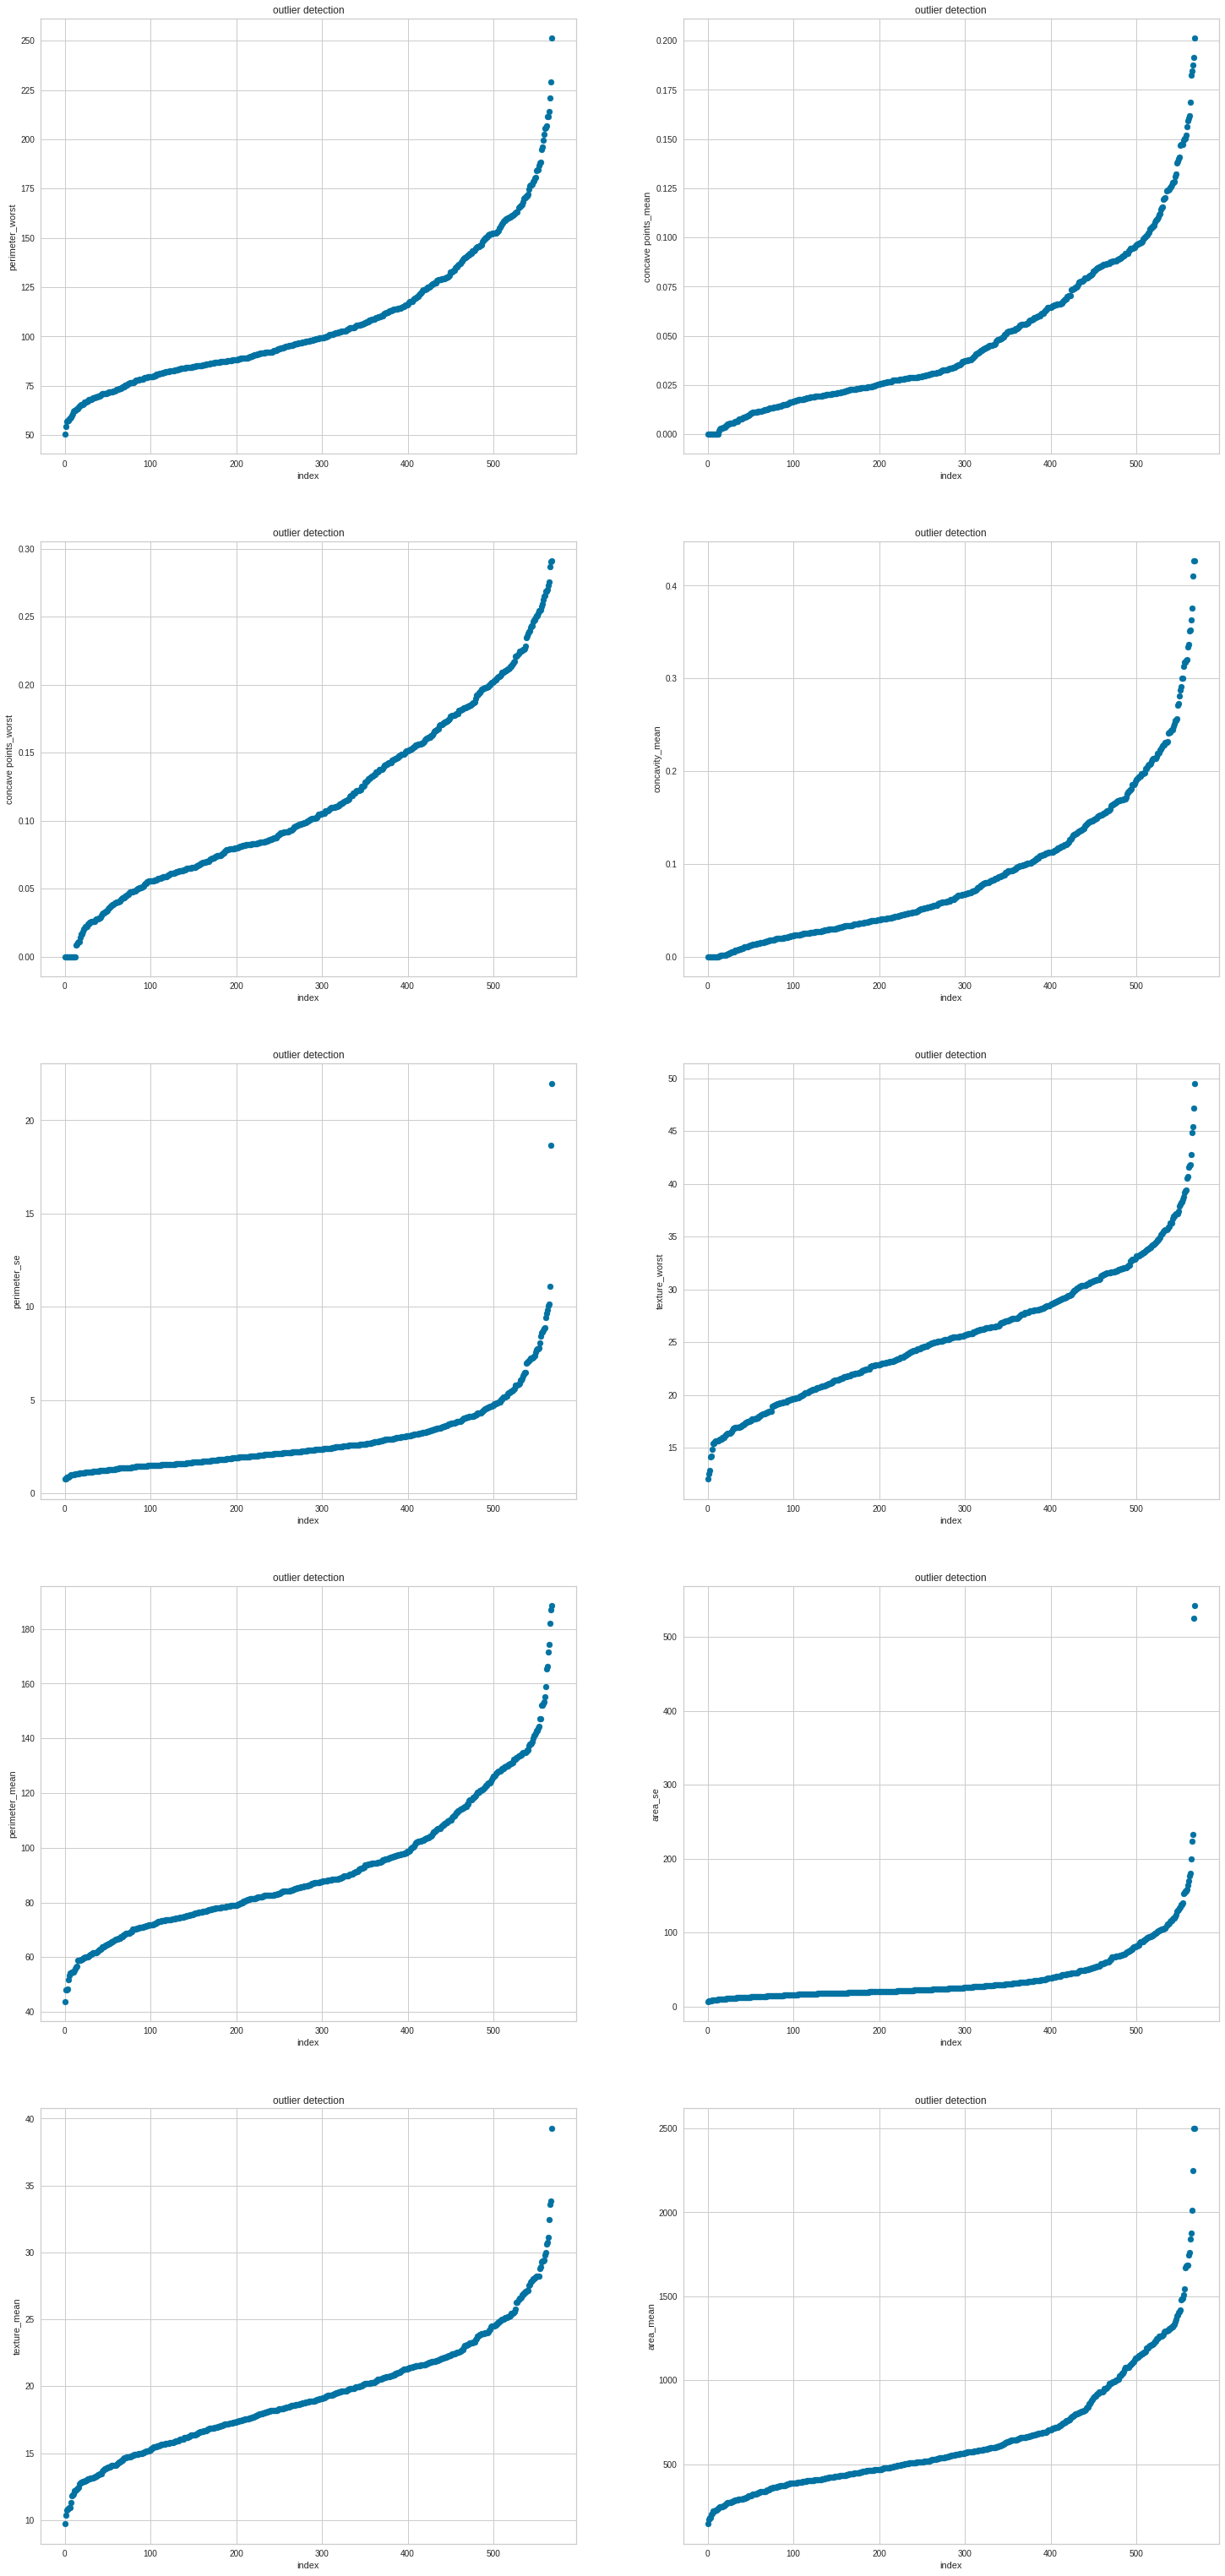

In [917]:
#outlier detection and visualisation!
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.figure(figsize = (25,55))
for i in range(10):
  plt.subplot(5, 2, i+1)
  plt.scatter(range(data.shape[0]), np.sort(data[cols[i]].values))
  plt.xlabel('index')
  plt.ylabel(cols[i])
  plt.title("outlier detection")
plt.show()

In [918]:
from sklearn.covariance import EllipticEnvelope
from sklearn import preprocessing
data = data.dropna()
f = pd.DataFrame()
clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(data)
ee_scores = pd.Series(clf.decision_function(data)) 
ee_predict = clf.predict(data)
f['predict']=ee_predict
f=f[f['predict']!=-1]
df = f

In [919]:
data['predict'] = f
s = data['predict'].isnull()
data['predict'] = s
for i in data.index:
    if data['predict'][i] == True:
       data = data.drop(i,axis =0)

data
      

    

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predict
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,False
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,False
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,False
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,False
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,False
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,False
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,False
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,False


In [920]:
df = data
X = df[df.columns[1:]]
y = df["diagnosis"]

In [921]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 123)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (409, 31), (409,)
Train Data: (103, 31), (103,)


In [922]:
counter = Counter(y_train)
counter

Counter({0: 281, 1: 128})

In [923]:
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 281, 1: 281})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [924]:
print(f"Total Data after Upsampling: {len(X_train)}")

Total Data after Upsampling: 562


In [925]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (562, 31), (562,)
Train Data: (103, 31), (103,)


Accuracy at k is  0.9805825242718447
Accuracy on Test Data: 98.05825242718447%
Precision Score: 0.9428571428571428
Recall Score: 1.0
F1 Score: 0.9705882352941176


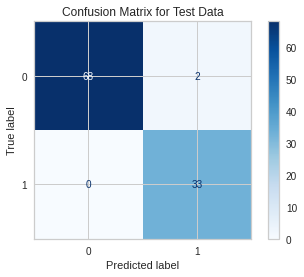

In [971]:
#KNeighbors classfication using standardScaler method.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier(12))
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy at k is ", accuracy)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(pipeline, X_test, y_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy at k is  0.941747572815534
Accuracy on Test Data: 94.1747572815534%
Precision Score: 0.8461538461538461
Recall Score: 1.0
F1 Score: 0.9166666666666666


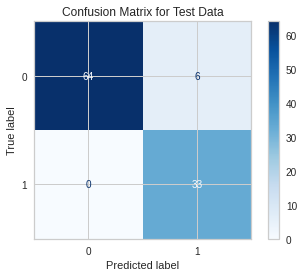

In [972]:
#Kneighbors classification using Minmaxscaler and chisquare test.
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
pipeline = make_pipeline(MinMaxScaler(), SelectKBest(score_func=chi2, k=2),KNeighborsClassifier(12))
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy at k is ", accuracy)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(pipeline, X_test, y_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy at k is  0.9805825242718447
Accuracy on Test Data: 98.05825242718447%
Precision Score: 0.9428571428571428
Recall Score: 1.0
F1 Score: 0.9705882352941176


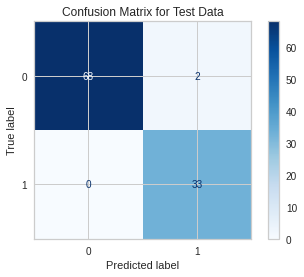

In [981]:
#KNeighbors classifier using pca method.
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
error_rate = []
pipeline = make_pipeline(MinMaxScaler(),KNeighborsClassifier(12))
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy at k is ", accuracy)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(pipeline, X_test, y_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

In [929]:
#Outofall the methods done, KNeighbours produce optimum results in the case of standard scaler with pca method on whole data.

In [930]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y, test_size = 0.1, random_state = 10)
print(f"Train Data: {X2_train.shape}, {y2_train.shape}")
print(f"Train Data: {X2_test.shape}, {y2_test.shape}")

Train Data: (460, 31), (460,)
Train Data: (52, 31), (52,)


Accuracy on Test Data: 88.46153846153845%
Precision Score: 0.9166666666666666
Recall Score: 0.6875
F1 Score: 0.7857142857142857


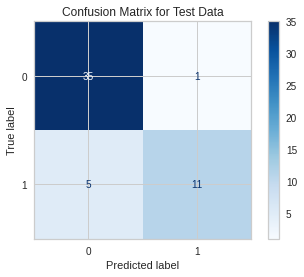

In [931]:
#svm method with chisqauretest and min max scaler
svm_pipeline = make_pipeline(MinMaxScaler(),SelectKBest(score_func=chi2, k=4),SVC(probability=True))
svm_pipeline.fit(X2_train, y2_train)
# Accuray On Test Data
predictions = svm_pipeline.predict(X2_test)
accuracy = accuracy_score(y2_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y2_test, predictions)}")
print(f"Recall Score: {recall_score(y2_test, predictions)}")
print(f"F1 Score: {f1_score(y2_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X2_test, y2_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 98.07692307692307%
Precision Score: 1.0
Recall Score: 0.9375
F1 Score: 0.967741935483871


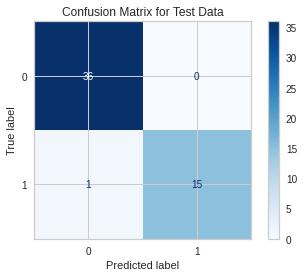

In [980]:
#svm method with standardscaler and pca method
svm_pipeline = make_pipeline(StandardScaler(),SVC(probability=True))
svm_pipeline.fit(X2_train, y2_train)
# Accuray On Test Data
predictions = svm_pipeline.predict(X2_test)
accuracy = accuracy_score(y2_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y2_test, predictions)}")
print(f"Recall Score: {recall_score(y2_test, predictions)}")
print(f"F1 Score: {f1_score(y2_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X2_test, y2_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 98.07692307692307%
Precision Score: 1.0
Recall Score: 0.9375
F1 Score: 0.967741935483871


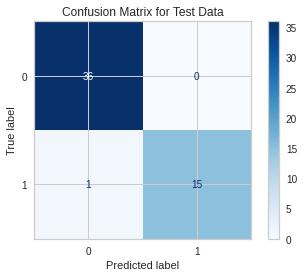

In [970]:
#outofall experimentations svm method with pca produce the optimised results!!
#svm method with minmax and pca method
svm_pipeline = make_pipeline(MinMaxScaler(),SVC(probability=True))
svm_pipeline.fit(X2_train, y2_train)
# Accuray On Test Data
predictions = svm_pipeline.predict(X2_test)
accuracy = accuracy_score(y2_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y2_test, predictions)}")
print(f"Recall Score: {recall_score(y2_test, predictions)}")
print(f"F1 Score: {f1_score(y2_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X2_test, y2_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

In [934]:
X1 = df[df.columns[1:]]
y1 = df["diagnosis"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1, test_size = 0.2, random_state = 0)
print(f"Train Data: {X1_train.shape}, {y1_train.shape}")
print(f"Train Data: {X1_test.shape}, {y1_test.shape}")

Train Data: (409, 31), (409,)
Train Data: (103, 31), (103,)


Accuracy at k is  0.9320388349514563
Accuracy on Test Data: 93.20388349514563%
Precision Score: 0.8666666666666667
Recall Score: 0.896551724137931
F1 Score: 0.8813559322033899


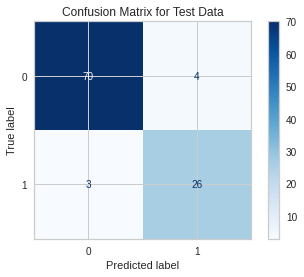

In [975]:
#decision tree classifier using standard scalar and min max scalar
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier())
#pipeline = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())


pipeline.fit(X1_train, y1_train)
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy at k is ", accuracy)

# Accuray On Test Data
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y1_test, predictions)}")
print(f"Recall Score: {recall_score(y1_test, predictions)}")
print(f"F1 Score: {f1_score(y1_test, predictions)}")
plot_confusion_matrix(pipeline, X1_test, y1_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

In [976]:
#decision tree regressor and min max scalar
#Note : Confusion matrix supports only classifer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
#pipeline = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())


pipeline.fit(X1_train, y1_train)
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy at k is ", accuracy)

# Accuray On Test Data
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y1_test, predictions)}")
print(f"Recall Score: {recall_score(y1_test, predictions)}")
print(f"F1 Score: {f1_score(y1_test, predictions)}")

Accuracy at k is  0.941747572815534
Accuracy on Test Data: 94.1747572815534%
Precision Score: 0.896551724137931
Recall Score: 0.896551724137931
F1 Score: 0.896551724137931


Accuracy at k is  0.9514563106796117
Accuracy on Test Data: 95.14563106796116%
Precision Score: 0.9
Recall Score: 0.9310344827586207
F1 Score: 0.9152542372881356


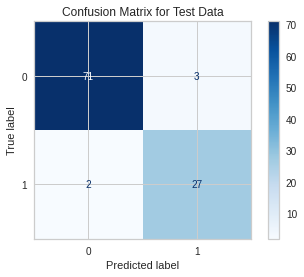

In [979]:
#decision tree classifier using j48 methodology and min max scalar
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
pipeline = make_pipeline(MinMaxScaler(),SelectKBest(score_func=chi2, k=2),DecisionTreeClassifier(criterion="entropy", max_depth=10))
#pipeline = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())


pipeline.fit(X1_train, y1_train)
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy at k is ", accuracy)

# Accuray On Test Data
predictions = pipeline.predict(X1_test)
accuracy = accuracy_score(y1_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y1_test, predictions)}")
print(f"Recall Score: {recall_score(y1_test, predictions)}")
print(f"F1 Score: {f1_score(y1_test, predictions)}")
plot_confusion_matrix(pipeline, X1_test, y1_test,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

In [950]:
col = data.columns
col

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'predict'],
      dtype='object')

In [963]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

model = PCA(n_components=15).fit(data)
X_pc = model.transform(data)
npc= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(npc)]

initial_feature_names = col

most_important_names = [initial_feature_names[most_important[i]] for i in range(npc)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(npc)}

df = pd.DataFrame(dic.items())

df

,0,1
0,PC0,area_worst
1,PC1,area_mean
2,PC2,area_se
3,PC3,texture_worst
4,PC4,perimeter_worst
5,PC5,perimeter_mean
6,PC6,texture_mean
7,PC7,perimeter_se
8,PC8,radius_worst
9,PC9,diagnosis


In [964]:
npc

15

In [966]:
X_pc

array([[ 1.39904139e+03, -3.43649359e+01, -1.07811302e+01, ...,
         6.50118198e-02, -5.91407334e-02,  2.46579973e-02],
       [ 1.12617564e+03, -4.39466537e+00,  2.08274383e+01, ...,
         3.02717108e-03, -1.02217532e-01,  2.44271663e-02],
       [-8.43437733e+01, -7.99849568e+01, -7.43160525e+00, ...,
        -1.88172343e-02, -3.23847077e-02,  2.26674211e-02],
       ...,
       [ 4.45902214e+02,  2.86114809e+01,  2.57500185e+00, ...,
         6.51065569e-02,  2.81402163e-02,  6.80441121e-02],
       [ 1.25540971e+03, -1.34051974e+01,  4.74338088e+00, ...,
        -1.33544269e-01, -2.54218020e-02,  2.85712744e-02],
       [-6.44676084e+02, -7.06766997e+01,  8.30395254e+00, ...,
        -1.10644495e-01,  3.66789173e-02, -8.35770134e-03]])

In [989]:
# Alternative method to find best column for target 
corr = data.corr()
cor_target = abs(corr["diagnosis"])    
relevant_features = cor_target[cor_target>0.5]    
r=[]
for i in relevant_features.index:
     r.append(i)
r


['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [1016]:
s=[]
for i in range(0,32):
     s.append(cor_target[i])
s.sort(reverse= True)
dic = {format(i): cor_target[i] for i in cor_target.index}
df = pd.DataFrame(dic.items())
a = df.sort_values(by = 1)
a




,0,1
10,fractal_dimension_mean,0.027175
12,texture_se,0.031760
19,symmetry_se,0.057499
20,fractal_dimension_se,0.067042
15,smoothness_se,0.110316
16,compactness_se,0.266965
17,concavity_se,0.309125
5,smoothness_mean,0.309860
9,symmetry_mean,0.312167
30,fractal_dimension_worst,0.332669
